In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('crmls_last_6_months.csv')
df.head()

/var/folders/wj/pl7rn_994599rvrbry_8wbqc0000gn/T/ipykernel_42579/595974816.py:3: DtypeWarning: Columns (78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crmls_last_6_months.csv')


,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,CloseDate,ClosePrice,ListAgentFirstName,ListAgentLastName,Latitude,Longitude,UnparsedAddress,PropertyType,LivingArea,ListPrice,DaysOnMarket,ListOfficeName,BuyerOfficeName,CoListOfficeName,ListAgentFullName,CoListAgentFirstName,CoListAgentLastName,BuyerAgentMlsId,BuyerAgentFirstName,BuyerAgentLastName,FireplacesTotal,AssociationFeeFrequency,AboveGradeFinishedArea,ListingKeyNumeric,MLSAreaMajor,TaxAnnualAmount,CountyOrParish,MlsStatus,ElementarySchool,AttachedGarageYN,ParkingTotal,BuilderName,PropertySubType,LotSizeAcres,SubdivisionName,BuyerOfficeAOR,YearBuilt,StreetNumberNumeric,ListingId,BathroomsTotalInteger,City,TaxYear,BuildingAreaTotal,BedroomsTotal,ContractStatusChangeDate,ElementarySchoolDistrict,CoBuyerAgentFirstName,PurchaseContractDate,ListingContractDate,BelowGradeFinishedArea,BusinessType,StateOrProvince,CoveredSpaces,MiddleOrJuniorSchool,FireplaceYN,Stories,HighSchool,Levels,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,2024-12-13,2100000.0,Paul,Locker,34.271680,-118.403023,11070 Borden Avenue,Land,NaN,2595000.0,468,Locker Realty Corp.,Keller Williams Realty Calabasas,NaN,Paul Locker,NaN,NaN,F207056278,Aaron,Mensch,NaN,NaN,NaN,552665323,PAC - Pacoima,NaN,Los Angeles,Closed,NaN,NaN,0.0,NaN,NaN,2.0300,Not Applicable-105,Southland,NaN,11070.0,320007992,0.0,Pacoima,NaN,NaN,NaN,2024-12-13,NaN,NaN,2023-01-19,2021-10-08,NaN,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88445.0,NaN,False,0.0,NaN,91331,NaN,88445.0,NaN,NaN,NaN
1,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,2024-12-23,125000.0,PATRICIA,PANDEY,33.668691,-117.334438,0 Lindsay,Land,NaN,150000.0,378,COLDWELL BANKER ASSOC BRKR/CL,Camou And Associates,NaN,PATRICIA PANDEY,NaN,NaN,TLACARUD,Rudolph,Lacayo,NaN,NaN,NaN,551977092,SRCAR - Southwest Riverside County,NaN,Riverside,Closed,NaN,NaN,NaN,NaN,NaN,0.2100,NaN,SouthwestRiversideCounty,NaN,0.0,IV21222586,NaN,Lake Elsinore,NaN,NaN,NaN,2024-12-23,NaN,NaN,2024-11-08,2021-10-05,NaN,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9148.0,NaN,False,NaN,NaN,92530,0.0,9148.0,NaN,NaN,NaN
2,PacificWest,PacificWest,NaN,True,NaN,NaN,NaN,300000.0,551927931,joshuacho1004@gmail.com,2024-12-23,135000.0,Joshua,Cho,34.499080,-116.857925,0 Camp Rock Road,Land,NaN,150000.0,1144,"Joshua Cho, Broker",Merci Real Estate,NaN,Joshua Cho,NaN,NaN,HD16328,Alba,Murcia-Riano,NaN,NaN,NaN,551927931,LUV - Lucerne Valley,NaN,San Bernardino,Closed,NaN,NaN,NaN,NaN,NaN,160.0000,NaN,HighDesert,NaN,0.0,PW21221460,NaN,Lucerne Valley,NaN,NaN,NaN,2024-12-23,NaN,NaN,2024-11-22,2021-10-05,NaN,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6969600.0,NaN,False,NaN,NaN,92356,0.0,6969600.0,NaN,NaN,NaN
3,Mlslistings,Mlslistings,"Carpet,Laminate,Tile",False,NaN,NaN,NaN,800000.0,544420694,assistant@danmoskowitz.com,2024-12-09,1120000.0,Daniel,Moskowitz,37.330858,-121.849610,1182 Winslow Drive,Residential,1151.0,1130000.0,79,Coldwell Banker Realty,Coldwell Banker Realty,NaN,Daniel Moskowitz,NaN,NaN,ML5072499,Vicky,Li,NaN,NaN,NaN,544420694,699 - Not Defined,NaN,Santa Clara,Closed,NaN,True,0.0,NaN,SingleFamilyResidence,0.1473,NaN,Mlslistings,1979.0,1182.0,ML81864545,6.0,San Jose,NaN,NaN,8.0,2024-12-09,NaN,NaN,2024-11-08,2021-09-28,NaN,NaN,CA,NaN,NaN,True,NaN,NaN,NaN,NaN,6418.0,NaN,False,0.0,Other,95122,NaN,6418.0,NaN,NaN,NaN
4,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,21500.0,516603298,jan@zapcom.net,2024-12-16,4000.0,Janice,Maschek,39.125024,-122.860206,2720 Lakeview Drive,Land,NaN,6000.0,1298,"Shore Line Realty, Inc.",Century 21 Epic,NaN,Janice Maschek,NaN,NaN,LCMICHAELL,Michael,Lowenstein,NaN,NaN,NaN,516603298,LCNIC - Nice,NaN,Lake,Closed,NaN,NaN,NaN,NaN,NaN,0.1047,NaN,LakeCounty,NaN,2720.0,LC21085

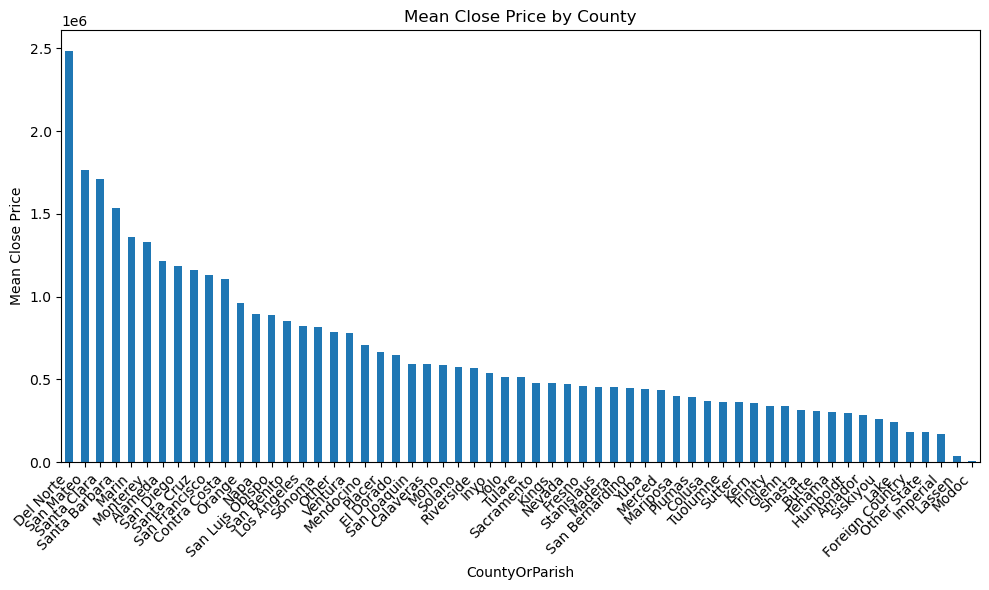

In [3]:
import matplotlib.pyplot as plt

mean_prices = df.groupby('CountyOrParish')['ClosePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar')
plt.ylabel('Mean Close Price')
plt.title('Mean Close Price by County')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
pd.set_option('display.max_rows', None)
nan_percent = df.isna().mean() * 100
print(nan_percent)

BuyerAgentAOR                     0.035845
ListAgentAOR                      0.035845
Flooring                         41.505632
ViewYN                            9.815839
WaterfrontYN                     99.929904
BasementYN                       98.366284
PoolPrivateYN                    12.227780
OriginalListPrice                 0.309856
ListingKey                        0.000000
ListAgentEmail                    0.361632
CloseDate                         0.000000
ClosePrice                        0.002390
ListAgentFirstName                0.531296
ListAgentLastName                 0.013541
Latitude                          0.015931
Longitude                         0.012745
UnparsedAddress                   0.164089
PropertyType                      0.000000
LivingArea                        7.321056
ListPrice                         0.165682
DaysOnMarket                      0.000000
ListOfficeName                    0.000000
BuyerOfficeName                   1.177295
CoListOffic

In [7]:
df.shape

(125542, 80)

In [9]:
columns_to_exclude = [
    'ListPrice', 'OriginalListPrice', 'ListingContractDate', 'ContractStatusChangeDate',
    'PurchaseContractDate', 'MlsStatus', 'DaysOnMarket', 'ListingId', 'ListingKey',
    'ListingKeyNumeric', 'CloseDate', 'BuyerAgentAOR', 'BuyerAgentFirstName',
    'BuyerAgentLastName', 'BuyerAgentMlsId', 'BuyerOfficeAOR', 'BuyerOfficeName',
    'CoBuyerAgentFirstName', 'ListAgentAOR', 'ListAgentEmail', 'ListAgentFirstName',
    'ListAgentLastName', 'ListAgentFullName', 'ListOfficeName', 'CoListOfficeName',
    'CoListAgentFirstName', 'CoListAgentLastName', 'MLSAreaMajor', 'BusinessType',
    'UnparsedAddress', 'FireplacesTotal', 'AboveGradeFinishedArea', 'TaxAnnualAmount',
    'ElementarySchoolDistrict', 'CoBuyerAgentFirstName', 'BelowGradeFinishedArea',
    'CoveredSpaces', 'TaxYear'
]

df = df.drop(columns=columns_to_exclude, errors='ignore')


In [11]:
df.shape

(125542, 43)

In [13]:
df = df[(df['PropertyType'] == 'Residential') & (df['PropertySubType'] == 'SingleFamilyResidence')]

In [15]:
df.shape

(61886, 43)

In [25]:
threshold = 0.60
na_percent = df.isna().mean()
df = df.drop(columns=na_percent[na_percent > threshold].index)
#drop columns with NaN more than 60%

In [27]:
df.shape

(61886, 30)

In [29]:
nan_percent = df.isna().mean() * 100
print(nan_percent)

Flooring                 36.072779
ViewYN                    8.698252
PoolPrivateYN             8.756423
ClosePrice                0.001616
Latitude                  0.006463
Longitude                 0.006463
PropertyType              0.000000
LivingArea                0.058171
CountyOrParish            0.000000
AttachedGarageYN         11.728016
ParkingTotal              0.000000
PropertySubType           0.000000
LotSizeAcres              1.821090
YearBuilt                 0.092105
StreetNumberNumeric       0.122806
BathroomsTotalInteger     0.014543
City                      0.092105
BedroomsTotal             0.000000
StateOrProvince           0.000000
FireplaceYN               0.061403
Stories                  12.253175
Levels                    8.780661
LotSizeArea               1.811395
MainLevelBedrooms        39.750509
NewConstructionYN         7.277898
GarageSpaces              3.782762
HighSchoolDistrict       26.461558
PostalCode                0.000000
AssociationFee      

In [10]:
df.head()

,Flooring,ViewYN,PoolPrivateYN,ClosePrice,Latitude,Longitude,PropertyType,LivingArea,CountyOrParish,AttachedGarageYN,ParkingTotal,PropertySubType,LotSizeAcres,YearBuilt,StreetNumberNumeric,BathroomsTotalInteger,City,BedroomsTotal,StateOrProvince,FireplaceYN,Stories,Levels,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet
3,"Carpet,Laminate,Tile",False,NaN,1120000.0,37.330858,-121.849610,Residential,1151.0,Santa Clara,True,0.0,SingleFamilyResidence,0.1473,1979.0,1182.0,6.0,San Jose,8.0,CA,True,NaN,NaN,6418.0,NaN,False,0.0,Other,95122,NaN,6418.0
12,NaN,True,False,890000.0,34.180411,-118.342020,Residential,1434.0,Los Angeles,False,1.0,SingleFamilyResidence,0.1486,1940.0,1377.0,1.0,Burbank,3.0,CA,True,1.0,One,6473.0,3.0,False,1.0,Burbank Unified,91505,0.0,6473.0
13,NaN,False,False,1138000.0,32.574359,-117.023836,Residential,2872.0,San Diego,True,6.0,SingleFamilyResidence,0.1198,2001.0,1252.0,3.0,San Diego,5.0,CA,True,2.0,Two,5219.0,NaN,False,3.0,NaN,92154,51.0,5219.0
14,Wood,True,False,670000.0,37.116859,-122.113773,Residential,800.0,Santa Cruz,False,8.0,SingleFamilyResidence,1.4153,1952.0,12540.0,1.0,Boulder Creek,2.0,CA,False,NaN,NaN,61649.0,NaN,False,0.0,Other,95006,NaN,61649.0
15,NaN,True,False,681877.0,33.725080,-117.222302,Residential,2824.0,Riverside,True,2.0,SingleFamilyResidence,0.1607,2024.0,25075.0,3.0,Menifee,5.0,CA,False,2.0,Two,7000.0,1.0,True,2.0,Mendocino Unified,92586,0.0,7000.0


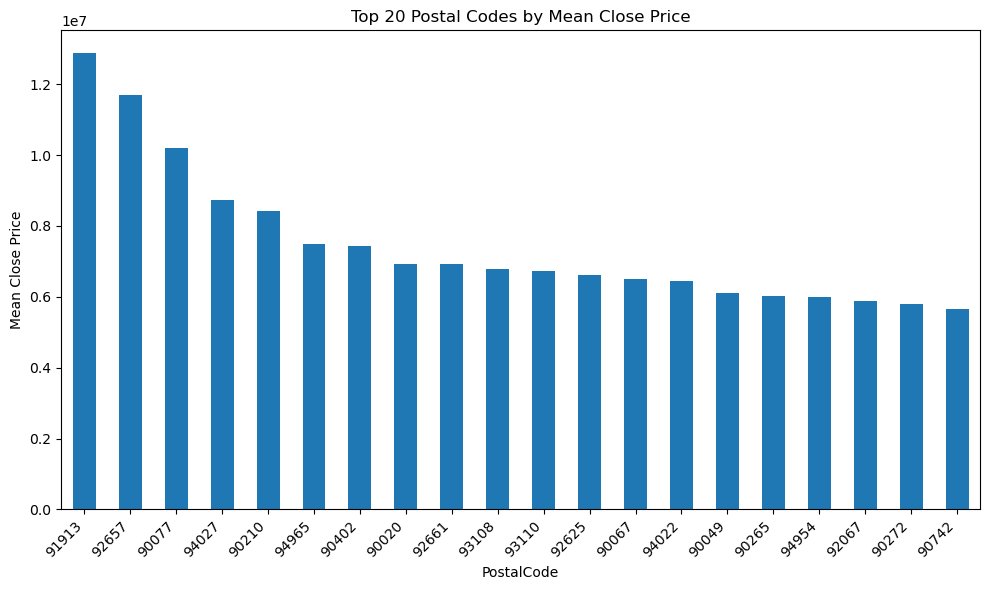

In [31]:
import matplotlib.pyplot as plt

mean_prices = df.groupby('PostalCode')['ClosePrice'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar')
plt.ylabel('Mean Close Price')
plt.title('Top 20 Postal Codes by Mean Close Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

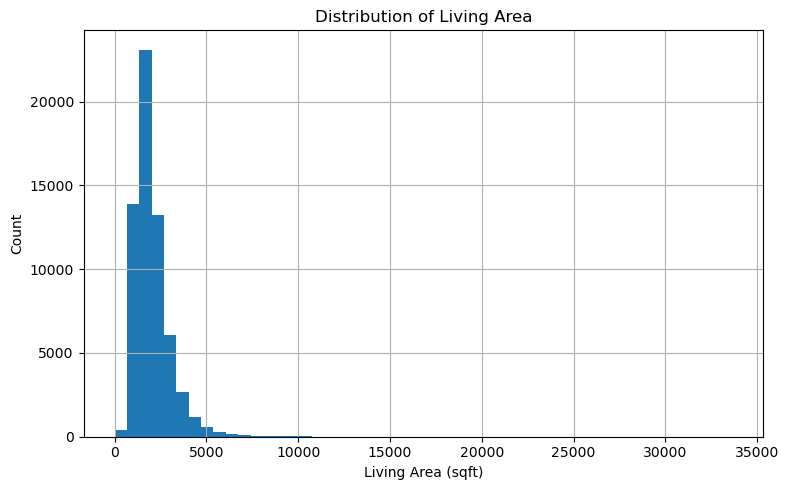

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['LivingArea'].hist(bins=50)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Count')
plt.title('Distribution of Living Area')
plt.tight_layout()
plt.show()

In [35]:
bins = [0, 1000, 1500, 2000, 2500, 3000, 4000, 5000, float('inf')]
labels = ['<1000', '1000–1499', '1500–1999', '2000–2499', '2500–2999', '3000–3999', '4000–4999', '5000+']
df['LivingArea_binned'] = pd.cut(df['LivingArea'], bins=bins, labels=labels)

df['LivingArea_binned'].value_counts(normalize=True, dropna=False)


LivingArea_binned
1500–1999    0.271370
1000–1499    0.265310
2000–2499    0.174983
2500–2999    0.100120
3000–3999    0.085948
<1000        0.059206
4000–4999    0.025127
5000+        0.016724
NaN          0.001212
Name: proportion, dtype: float64

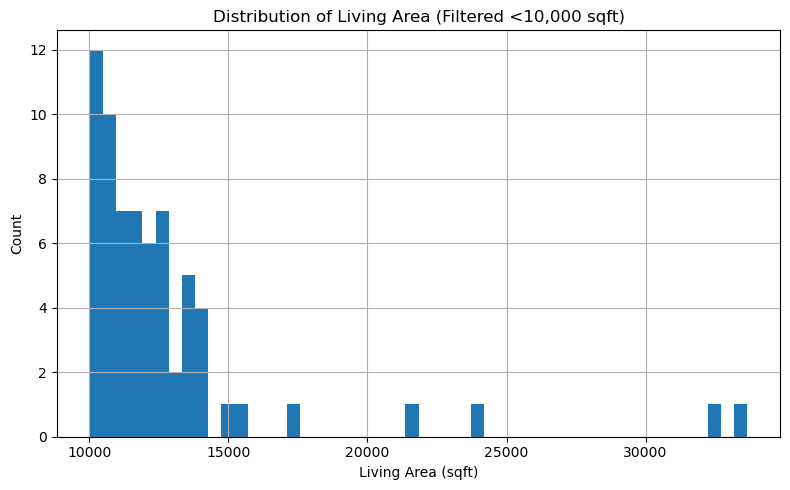

In [57]:
import matplotlib.pyplot as plt

# Filter out extremely large LivingArea values
df_filtered = df[df['LivingArea'] > 10000]

plt.figure(figsize=(8, 5))
df_filtered['LivingArea'].hist(bins=50)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Count')
plt.title('Distribution of Living Area (Filtered <10,000 sqft)')
plt.tight_layout()
plt.show()


In [39]:
df['BedroomsTotal'].value_counts(normalize=True, dropna=False)


BedroomsTotal
3.0     0.426639
4.0     0.329008
2.0     0.115018
5.0     0.100249
6.0     0.017161
1.0     0.006043
7.0     0.003539
8.0     0.001002
0.0     0.000792
9.0     0.000226
10.0    0.000162
12.0    0.000048
11.0    0.000032
15.0    0.000016
31.0    0.000016
13.0    0.000016
45.0    0.000016
17.0    0.000016
Name: proportion, dtype: float64

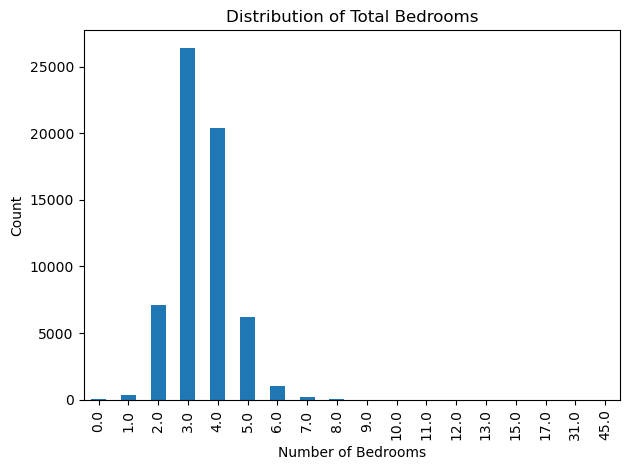

In [41]:
import matplotlib.pyplot as plt

df['BedroomsTotal'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Total Bedrooms')
plt.tight_layout()
plt.show()


In [43]:
df.shape

(61886, 31)

Correlation between LivingArea and ClosePrice: 0.1758


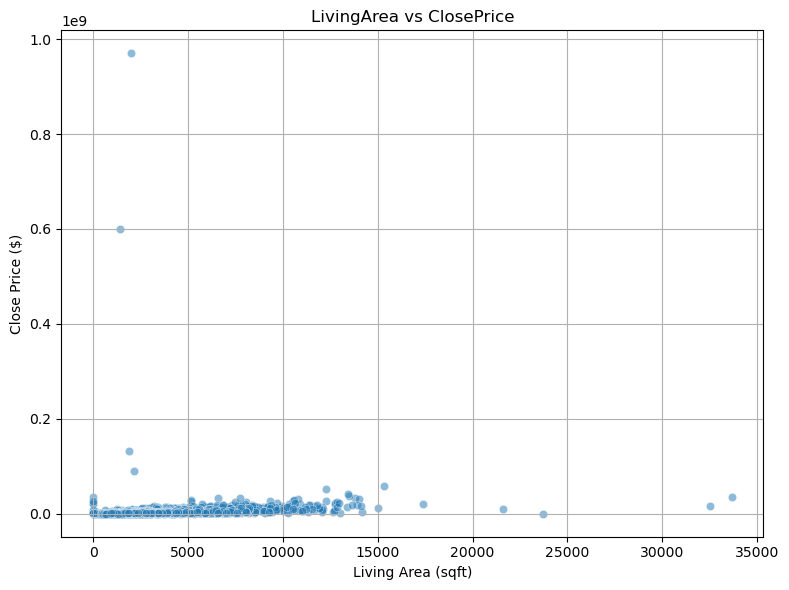

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in either column
subset = df[['LivingArea', 'ClosePrice']].dropna()

# Calculate correlation
correlation = subset['LivingArea'].corr(subset['ClosePrice'])
print(f"Correlation between LivingArea and ClosePrice: {correlation:.4f}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset, x='LivingArea', y='ClosePrice', alpha=0.5)
plt.title('LivingArea vs ClosePrice')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation after dropping outliers: 0.6374


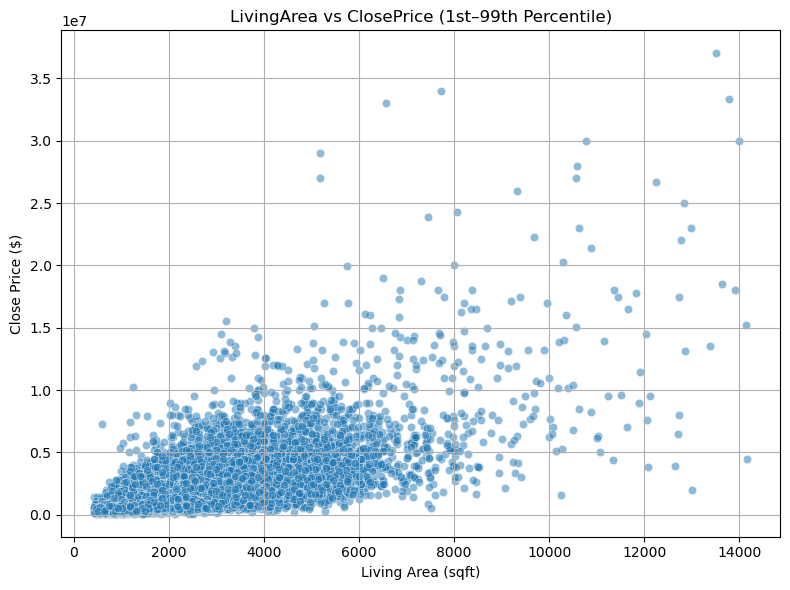

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values
subset = df[['LivingArea', 'ClosePrice']].dropna()

# Drop outliers outside the 1st–99th percentile range
filtered = subset[
    (subset['LivingArea'] >= subset['LivingArea'].quantile(0.001)) &
    (subset['LivingArea'] <= subset['LivingArea'].quantile(0.9999)) &
    (subset['ClosePrice'] >= subset['ClosePrice'].quantile(0.001)) &
    (subset['ClosePrice'] <= subset['ClosePrice'].quantile(0.9999))
]

# Calculate correlation
correlation = filtered['LivingArea'].corr(filtered['ClosePrice'])
print(f"Correlation after dropping outliers: {correlation:.4f}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered, x='LivingArea', y='ClosePrice', alpha=0.5)
plt.title('LivingArea vs ClosePrice (1st–99th Percentile)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
